In [1]:
import pandas as pd

df_data = pd.read_csv("./dataset_phishing_1.csv")
df_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,label
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,1,0,45,-1,0,1,1,4,legitimate,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,0,0,77,5767,0,0,1,2,phishing,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,0,0,14,4004,5828815,0,1,0,phishing,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,0,0,62,-1,107721,0,0,3,legitimate,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,1,0,224,8175,8725,0,0,6,legitimate,0


In [2]:
from sklearn.model_selection import train_test_split

#Train & Test Set
X= df_data.iloc[: , 1:-2]
y= df_data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=85)
print("\n--Training data samples--")
print(X_train.shape)


--Training data samples--
(8572, 87)


In [3]:
X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,...,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,...,0,0,1,0,224,8175,8725,0,0,6


In [4]:
input_shape = [X_train.shape[1]]

In [5]:
#ANN
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 87)               348       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               45056     
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2

In [6]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [7]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.01,
    restore_best_weights=True,
)
fit_history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping],
)

Epoch 1/50
17/17 [==============================] - 1s 24ms/step - loss: 0.2802 - binary_accuracy: 0.8934 - val_loss: 0.5508 - val_binary_accuracy: 0.6917
Epoch 2/50
17/17 [==============================] - 0s 16ms/step - loss: 0.1494 - binary_accuracy: 0.9453 - val_loss: 0.4309 - val_binary_accuracy: 0.7712
Epoch 3/50
17/17 [==============================] - 0s 16ms/step - loss: 0.1227 - binary_accuracy: 0.9549 - val_loss: 0.4343 - val_binary_accuracy: 0.7691
Epoch 4/50
17/17 [==============================] - 0s 16ms/step - loss: 0.1112 - binary_accuracy: 0.9577 - val_loss: 0.2938 - val_binary_accuracy: 0.8817
Epoch 5/50
17/17 [==============================] - 0s 21ms/step - loss: 0.1012 - binary_accuracy: 0.9628 - val_loss: 0.2401 - val_binary_accuracy: 0.9167
Epoch 6/50
17/17 [==============================] - 0s 21ms/step - loss: 0.0909 - binary_accuracy: 0.9675 - val_loss: 0.2150 - val_binary_accuracy: 0.9230
Epoch 7/50
17/17 [==============================] - 0s 21ms/step - los

In [8]:
print('Accuracy: %.4f '%(model.evaluate(X_test, y_test)[1]))

90/90 [==============================] - 0s 2ms/step - loss: 0.1257 - binary_accuracy: 0.9580
Accuracy: 0.9580 


In [9]:
fit_history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

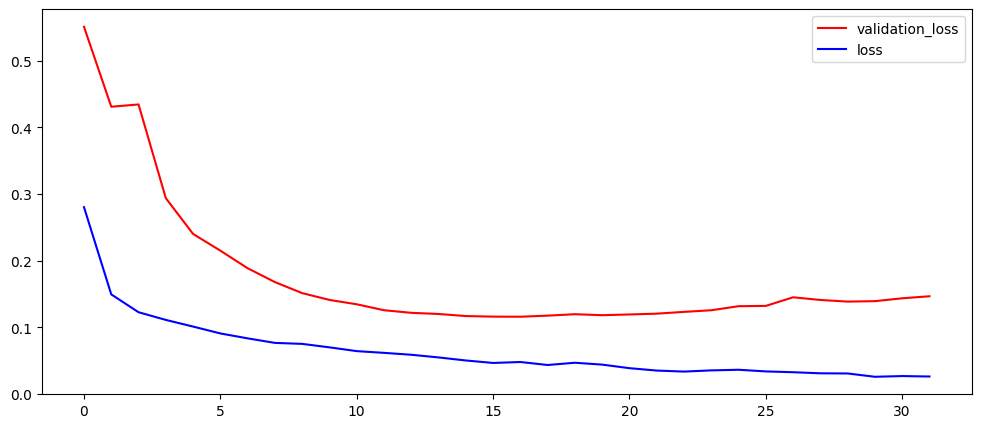

In [10]:
import matplotlib.pyplot as plt
import numpy as np
#그래프로 확인
vloss = fit_history.history['val_loss']   #테스트 셋 Loss
loss = fit_history.history['loss']   #학습셋

plt.figure(figsize = (12, 5))
epoch = np.arange(len(loss))
plt.plot(epoch, vloss, 'r', label='validation_loss')
plt.plot(epoch, loss, 'b', label='loss')
plt.legend(loc='best')
plt.show()

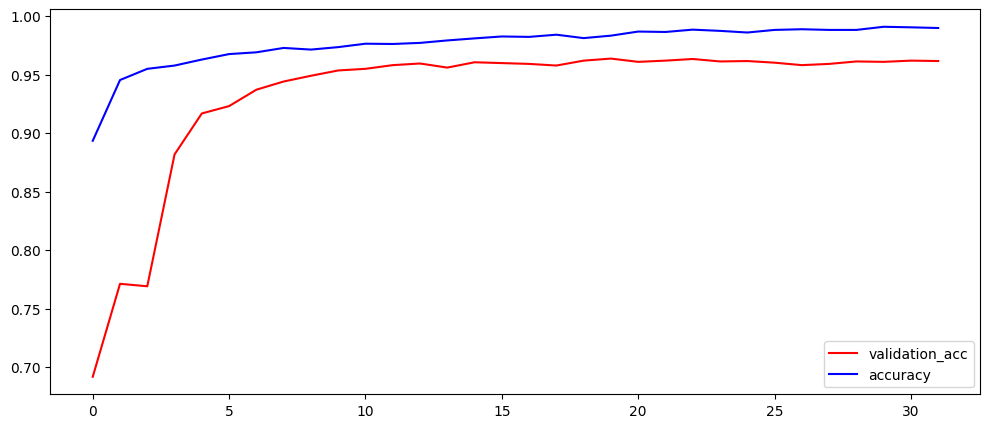

In [11]:
vacc = fit_history.history['val_binary_accuracy']
acc = fit_history.history['binary_accuracy']

plt.figure(figsize = (12, 5))
epoch = np.arange(len(loss))
plt.plot(epoch, vacc, 'r', label='validation_acc')
plt.plot(epoch, acc, 'b', label='accuracy')
plt.legend(loc='best')
plt.show()